# **Тестовое задание Data аналитик**
<br>  

#### Выполнил: Михаил Караваев, аналитик

karavaevms@gmail.com  

https://t.me/karavaevms  

https://www.linkedin.com/in/mikhail-karavaev/

См. задание по [ссылке](https://disk.yandex.ru/d/i9ydGpo04f0sLw)  
<br>
**Контекст**: продуктовая команда хочет добавить фичу в инструмент Управление ценой
(Репрайсер) – настройку цены на товар в зависимости от времени и дня недели. Для этого нужно
изучить нюансы распределения продаж в течение дня.
Задача: провести исследование суточной сезонности продаж на Wildberries  
<br>  

**Подзадачи:**  

1. Как в среднем распределяются продажи в течение дня?  

2. Меняется ли распределение продаж в течение дня в зависимости от дня недели?  

3. Меняется ли распределение продаж в течение дня в выходные и праздники?  

4. Зависит ли распределение продаж в течение дня от времени года/месяца?  

5. Влияет ли категория товара (предмет или группа предметов) на распределение продаж в течение дня?  
<br>  

**Данные**  

1. **«test_data.feather»** – данные о ненулевых продажах товаров  

  1. `id` – идентификатор товара на Wildberries  

  2. `data` – дата и время обхода товара парсером MPSTATS  

  3. `sells` – изменение остатков товара по сравнению с прошлым обходом (продажи)  
  4. `date` – только дата от второго столбца  

2. **«sku_subject_info.csv»** – данные о принадлежности товаров к предмету (категории)  

  1. `id` – идентификатор товара на Wildberries  
  2. `subject_id` – идентификатор предмета на Wildberries  

3. **«subject_names.csv»** – данные о предметах  

  1. `subject_id` – идентификатор предмета на Wildberries  

  2. `name` – название предмета  
  
  3. `groupname` – категория предмета  

Рекомендация по формату решения: Python Notebook  

**Что может помочь:**  

База знаний – [Управление ценой](https://wiki.mpstats.io/ru/%D0%A1%D1%82%D1%83%D0%B4%D0%B8%D1%8F/%D0%A3%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%86%D0%B5%D0%BD%D0%BE%D0%B9)  

[Видео](https://www.youtube.com/watch?v=n6kXWV8ni2E) о работе инструмента

> #### **Спойлер (если результат узнать хочется, а читать лень)**  
>
> Выводы:  
>
> 1. Распределение продаж в течение дня близко к нормальному  
>
> 2. Распределение продаж в течение дня для разных дней недели почти одинаковое, с небольшими пиками в пятницу в 11 часов, во вторник в 12 и 18 часов, в понедельник в 18 часов.  
>
> 3. В целом распределение продаж в выходные, праздничные и рабочие дни совпадает, за исключением пиков продаж в выходные и праздники в 13, 15 и 17 часов, а также в праздники в 18 часов  
>
> 4. Продажи по месяцам укладываются в единый тренд, при этом выбиваются из тренда майские, ноябрьские и декабрьские продажи.
>
> 5. В продажах товаров и групп товаров есть определенные закономерности, но некоторые товары и их группы выбиваются их тренда


### Загрузка данных и предобработка

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_feather('/content/data/test_data.feather')
df

id                data  sells        date
0            461732 2022-10-04 04:10:26      3  2022-10-04
1            461732 2022-10-04 05:10:26      3  2022-10-04
2            461732 2022-10-04 05:12:45      1  2022-10-04
3            461732 2022-10-04 06:10:14      1  2022-10-04
4            461732 2022-10-04 06:11:50      1  2022-10-04
...             ...                 ...    ...         ...
13047390  169209602 2022-12-02 21:10:44      2  2022-12-02
13047391  169209602 2022-12-02 22:58:46    357  2022-12-02
13047392  169209602 2022-12-02 23:11:15     21  2022-12-02
13047393  169209602 2022-12-02 23:40:53     57  2022-12-02
13047394  169209602 2022-12-02 23:58:39     19  2022-12-02

[13047395 rows x 4 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13047395 entries, 0 to 13047394
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   data    datetime64[ns]
 2   sells   int64         
 3   date    object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 398.2+ MB


<Axes: >

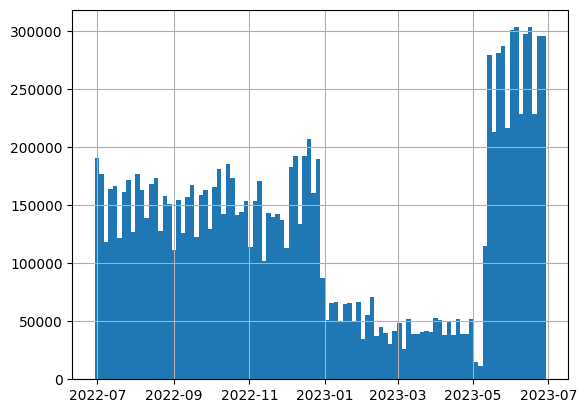

In [8]:
df['date'].hist(bins=100)

In [9]:
sku = pd.read_csv('/content/data/sku_subject_info.csv')
sku

id  subject_id
0     420838592        2652
1     316385942         385
2      26469212         285
3     357250622         133
4       8706992         385
...         ...         ...
8840   40313093          90
8841   45344633         185
8842   15188243          69
8843   53060783         745
8844  119171723         358

[8845 rows x 2 columns]

In [10]:
sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8845 entries, 0 to 8844
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          8845 non-null   int64
 1   subject_id  8845 non-null   int64
dtypes: int64(2)
memory usage: 138.3 KB


In [11]:
# Проверяем, есть ли "лишние" id (представленные в одной таблице и не представленные в другой)
set(df['id']) - set(sku['id'])

{6263027,
 32363444,
 32837210,
 39287318,
 41548457,
 42717098,
 52334372,
 66425441,
 69789191,
 80070122,
 102244967,
 119553461,
 130440953,
 148111679,
 183269774,
 221358281,
 418213673,
 418213676,
 433612571,
 489848132}

In [12]:
set(sku['id']) - set(df['id'])

set()

In [13]:
# Создаем список "лишних" id...
diff = list(set(df['id']) - set(sku['id']))
diff

[69789191,
 183269774,
 39287318,
 433612571,
 52334372,
 418213673,
 42717098,
 41548457,
 418213676,
 32363444,
 119553461,
 148111679,
 489848132,
 221358281,
 32837210,
 66425441,
 102244967,
 80070122,
 6263027,
 130440953]

In [14]:
# ... и удаляем содержащие их строки
df = df[~df['id'].isin(diff)]
df

id                data  sells        date
0            461732 2022-10-04 04:10:26      3  2022-10-04
1            461732 2022-10-04 05:10:26      3  2022-10-04
2            461732 2022-10-04 05:12:45      1  2022-10-04
3            461732 2022-10-04 06:10:14      1  2022-10-04
4            461732 2022-10-04 06:11:50      1  2022-10-04
...             ...                 ...    ...         ...
13047390  169209602 2022-12-02 21:10:44      2  2022-12-02
13047391  169209602 2022-12-02 22:58:46    357  2022-12-02
13047392  169209602 2022-12-02 23:11:15     21  2022-12-02
13047393  169209602 2022-12-02 23:40:53     57  2022-12-02
13047394  169209602 2022-12-02 23:58:39     19  2022-12-02

[13036422 rows x 4 columns]

Поскольку наша задача - провести исследование суточной сезонности продаж, выберем уровень гранулярности данных равным одному часу (подробнее о гранулярности можно почитать [здесь](https://www.coursera.org/articles/data-granularity))  

Для этого создадим отдельную колонку для часа `hour`, который мы возьмем из колонки `data`  

*Примечание*. В соответствии с описанием, таблица `test_data.feather` отражает "*изменение остатков товара по сравнению с прошлым обходом (продажи)*", т.е. то, сколько товаров было продано с последнего обхода товаров парсером. Гипотетически может быть ситуация, когда предыдущий обход был 3 дня назад, и в этом случае возникает вопрос, к какому дню и часу относить данную продажу. Здесь есть о чем поразмышлять, однако для простоты **будем считать, что продажа была совершена в момент, указанный в колонке `data`**  


In [15]:
df['hour'] = df.data.dt.hour
df

<ipython-input-15-2411063d9dd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.data.dt.hour


id                data  sells        date  hour
0            461732 2022-10-04 04:10:26      3  2022-10-04     4
1            461732 2022-10-04 05:10:26      3  2022-10-04     5
2            461732 2022-10-04 05:12:45      1  2022-10-04     5
3            461732 2022-10-04 06:10:14      1  2022-10-04     6
4            461732 2022-10-04 06:11:50      1  2022-10-04     6
...             ...                 ...    ...         ...   ...
13047390  169209602 2022-12-02 21:10:44      2  2022-12-02    21
13047391  169209602 2022-12-02 22:58:46    357  2022-12-02    22
13047392  169209602 2022-12-02 23:11:15     21  2022-12-02    23
13047393  169209602 2022-12-02 23:40:53     57  2022-12-02    23
13047394  169209602 2022-12-02 23:58:39     19  2022-12-02    23

[13036422 rows x 5 columns]

Теперь добавим колонку `dow` (day of week) "день недели" (0 - понедельник, 6 - воскресенье) с помощью функции `dt.dayofweek` (см. [документацию](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html)). Это понадобится нам для решения подзадач 2 и 3.

In [16]:
df['dow'] = df['data'].dt.dayofweek
df

<ipython-input-16-9bfc48c69b51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dow'] = df['data'].dt.dayofweek


id                data  sells        date  hour  dow
0            461732 2022-10-04 04:10:26      3  2022-10-04     4    1
1            461732 2022-10-04 05:10:26      3  2022-10-04     5    1
2            461732 2022-10-04 05:12:45      1  2022-10-04     5    1
3            461732 2022-10-04 06:10:14      1  2022-10-04     6    1
4            461732 2022-10-04 06:11:50      1  2022-10-04     6    1
...             ...                 ...    ...         ...   ...  ...
13047390  169209602 2022-12-02 21:10:44      2  2022-12-02    21    4
13047391  169209602 2022-12-02 22:58:46    357  2022-12-02    22    4
13047392  169209602 2022-12-02 23:11:15     21  2022-12-02    23    4
13047393  169209602 2022-12-02 23:40:53     57  2022-12-02    23    4
13047394  169209602 2022-12-02 23:58:39     19  2022-12-02    23    4

[13036422 rows x 6 columns]

Создадим датафрейм `df_grouped`, в котором продажи будут сгруппированы по часам  

In [17]:
df_1 = df
df_grouped = df_1.groupby(['id', 'date', 'hour', 'dow'])['sells'].sum().reset_index()

df_grouped = df_grouped.rename(columns={'sells': 'sales'})
df_grouped

id        date  hour  dow  sales
0           407753  2022-07-06     1    2      1
1           407753  2022-07-06     2    2      1
2           407753  2022-07-06     3    2      2
3           407753  2022-07-06     5    2      2
4           407753  2022-07-06     6    2      4
...            ...         ...   ...  ...    ...
8742426  500182868  2023-06-29    16    3     14
8742427  500182868  2023-06-29    17    3     26
8742428  500182868  2023-06-29    18    3     18
8742429  500182868  2023-06-29    19    3     18
8742430  500182868  2023-06-29    22    3     11

[8742431 rows x 5 columns]

<Axes: >

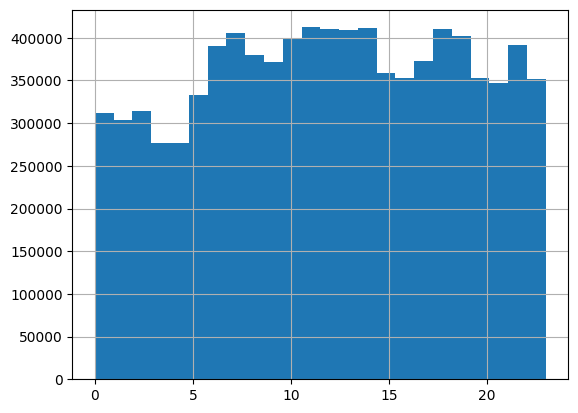

In [18]:
# (это график, отражающий количество проходов парсером за каждый час)
df_grouped.hour.hist(bins=24)

## Подзадачи  
<br>  

### 1. Как в среднем распределяются продажи в течение дня?

Создадим датафрейм `df_sales_hour`, отражающий количество продаж в каждый час...

In [19]:
df_sales_hour = df_grouped.groupby(['hour'])['sales'].sum().reset_index()
df_sales_hour

hour    sales
0      0  1672139
1      1  1504473
2      2  1891686
3      3  2148366
4      4  3018943
5      5  4623212
6      6  6703464
7      7  8413405
8      8  7271317
9      9  8863915
10    10  9190807
11    11  9325414
12    12  9461305
13    13  8251686
14    14  8105805
15    15  6825073
16    16  8382873
17    17  7577005
18    18  9332848
19    19  5823168
20    20  5616492
21    21  4392092
22    22  5306955
23    23  1917846

... и построим гистограмму

<Axes: xlabel='hour'>

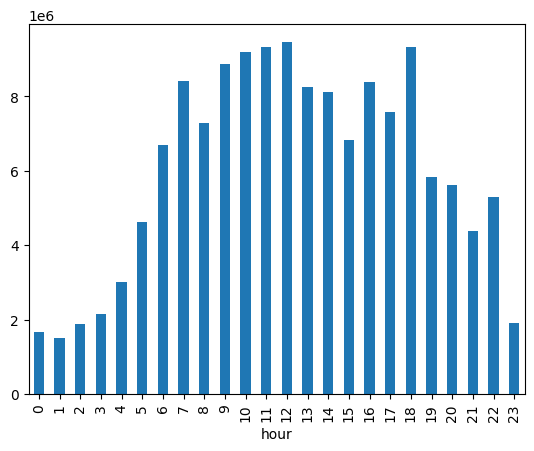

In [20]:
df_sales_hour.plot(kind='bar', x='hour', y='sales', legend=False)

_<u>Распределение продаж близко к нормальному</u>_ (напомню, что по факту мы видим распределение изменений остатка товара на момент обхода парсером MPSTATS).

### 2. Меняется ли распределение продаж в течение дня в зависимости от дня недели?

Для начала проанализируем все продажи в течение недели (это не входит в список задач, но нам же все равно интересно!)

In [21]:
x = df_grouped.groupby(['dow'])['sales'].sum().reset_index()
x

dow     sales
0    0  20550570
1    1  21298317
2    2  21245824
3    3  22023988
4    4  21792905
5    5  19136339
6    6  19572346

<Axes: xlabel='dow'>

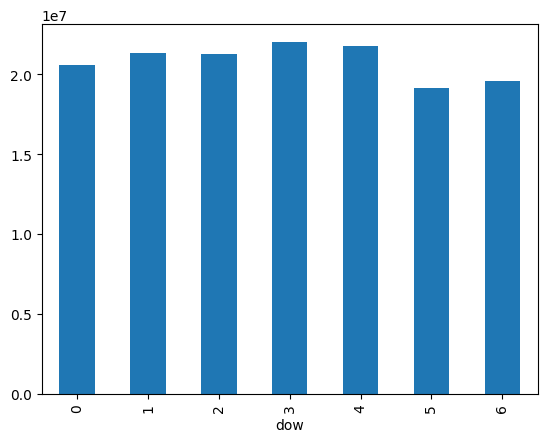

In [22]:
x.plot(kind='bar', x='dow', y='sales', legend=False)


Значения для всех дней недели почти одинаковы, т.е. распределение близко к непрерывному равномерному.

### Ниже мы добавим в наш датафрейм колонки `weekend`, `holiday`, `month`, `season`. Эти колонки потребуются нам для решения подзадач 3 и 4

Добавим колонку `weekend`, которая будет принимать значение `True` в случае, если день недели выходной.

*Примечание*. Иногда случаются "длинные каникулы" и перенос рабочих и нерабочих дней, но мы этим пренебрежем.

In [23]:
df_mod = df_grouped
df_mod['weekend'] = df_mod['dow'].isin([5, 6])
df_mod

id        date  hour  dow  sales  weekend
0           407753  2022-07-06     1    2      1    False
1           407753  2022-07-06     2    2      1    False
2           407753  2022-07-06     3    2      2    False
3           407753  2022-07-06     5    2      2    False
4           407753  2022-07-06     6    2      4    False
...            ...         ...   ...  ...    ...      ...
8742426  500182868  2023-06-29    16    3     14    False
8742427  500182868  2023-06-29    17    3     26    False
8742428  500182868  2023-06-29    18    3     18    False
8742429  500182868  2023-06-29    19    3     18    False
8742430  500182868  2023-06-29    22    3     11    False

[8742431 rows x 6 columns]

Добавим колонку `holiday`, которая будет принимать значение `True`, если день является праздничным (список праздничных дней взят [отсюда](https://www.consultant.ru/document/cons_doc_LAW_34683/98ef2900507766e70ff29c0b9d8e2353ea80a1cf/) )  

In [24]:
holidays = ['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08',
            '02-23', '03-08', '05-01', '05-09', '06-12', '11-04']

df_mod['date'] = pd.to_datetime(df_mod['date'])

df_mod['month_day'] = df_mod['date'].dt.strftime('%m-%d')

df_mod['holiday'] = df_mod['month_day'].isin(holidays)

df_mod.drop(columns=['month_day'], inplace=True)
df_mod

id       date  hour  dow  sales  weekend  holiday
0           407753 2022-07-06     1    2      1    False    False
1           407753 2022-07-06     2    2      1    False    False
2           407753 2022-07-06     3    2      2    False    False
3           407753 2022-07-06     5    2      2    False    False
4           407753 2022-07-06     6    2      4    False    False
...            ...        ...   ...  ...    ...      ...      ...
8742426  500182868 2023-06-29    16    3     14    False    False
8742427  500182868 2023-06-29    17    3     26    False    False
8742428  500182868 2023-06-29    18    3     18    False    False
8742429  500182868 2023-06-29    19    3     18    False    False
8742430  500182868 2023-06-29    22    3     11    False    False

[8742431 rows x 7 columns]

Добавим колонку `month`, которая будет указывать номер месяца

In [25]:
df_mod['month'] = df_mod['date'].dt.month
df_mod

id       date  hour  dow  sales  weekend  holiday  month
0           407753 2022-07-06     1    2      1    False    False      7
1           407753 2022-07-06     2    2      1    False    False      7
2           407753 2022-07-06     3    2      2    False    False      7
3           407753 2022-07-06     5    2      2    False    False      7
4           407753 2022-07-06     6    2      4    False    False      7
...            ...        ...   ...  ...    ...      ...      ...    ...
8742426  500182868 2023-06-29    16    3     14    False    False      6
8742427  500182868 2023-06-29    17    3     26    False    False      6
8742428  500182868 2023-06-29    18    3     18    False    False      6
8742429  500182868 2023-06-29    19    3     18    False    False      6
8742430  500182868 2023-06-29    22    3     11    False    False      6

[8742431 rows x 8 columns]

И, наконец, добавим колонку `season`

In [26]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df_mod['season'] = df_mod['month'].apply(get_season)
df_mod

id       date  hour  dow  sales  weekend  holiday  month  \
0           407753 2022-07-06     1    2      1    False    False      7   
1           407753 2022-07-06     2    2      1    False    False      7   
2           407753 2022-07-06     3    2      2    False    False      7   
3           407753 2022-07-06     5    2      2    False    False      7   
4           407753 2022-07-06     6    2      4    False    False      7   
...            ...        ...   ...  ...    ...      ...      ...    ...   
8742426  500182868 2023-06-29    16    3     14    False    False      6   
8742427  500182868 2023-06-29    17    3     26    False    False      6   
8742428  500182868 2023-06-29    18    3     18    False    False      6   
8742429  500182868 2023-06-29    19    3     18    False    False      6   
8742430  500182868 2023-06-29    22    3     11    False    False      6   

         season  
0        Summer  
1        Summer  
2        Summer  
3        Summer  
4        Summer  
...         ...  
8742426  Summer  
8742427  Summer  
8742428  Summer  
8742429  Summer  
8742430  Summer  

[8742431 rows x 9 columns]

Построим графики продаж в зависимости от часа для каждого дня недели.
Графики будут двух видов: абсолютное количество продаж и относительное (доля от всех продаж за один и тот же день недели по часам)

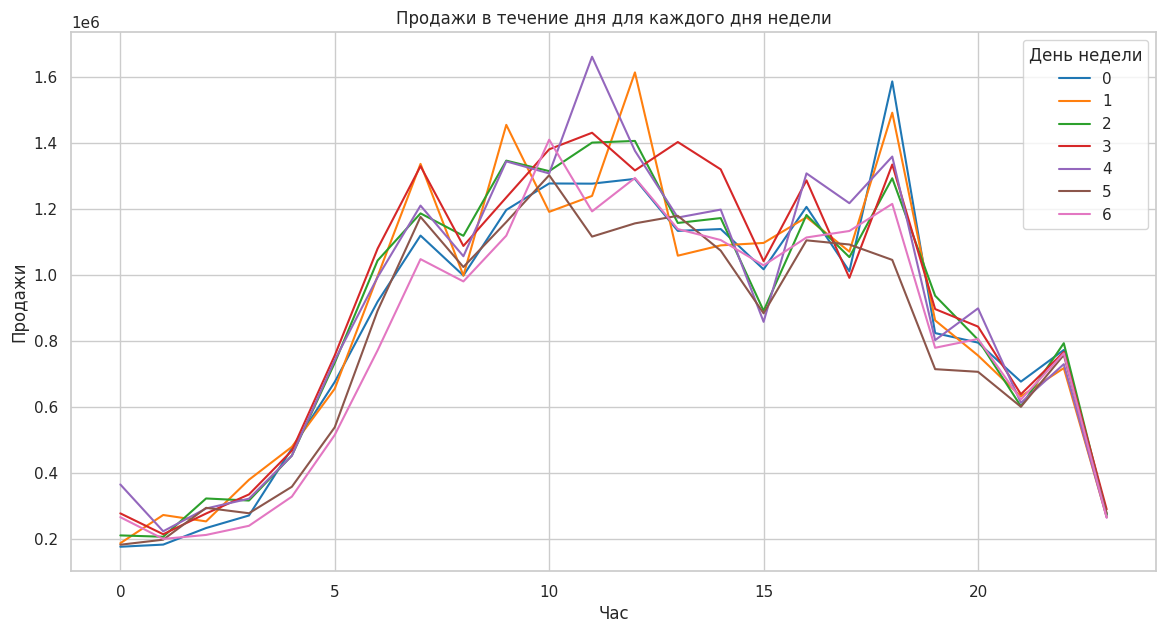

In [29]:
df_grouped = df_mod.groupby(['dow', 'hour'])['sales'].sum().reset_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped, x='hour', y='sales', hue='dow', palette='tab10')

plt.title('Продажи в течение дня для каждого дня недели')
plt.xlabel('Час')
plt.ylabel('Продажи')
plt.legend(title='День недели')

plt.show()

И относительная доля продаж

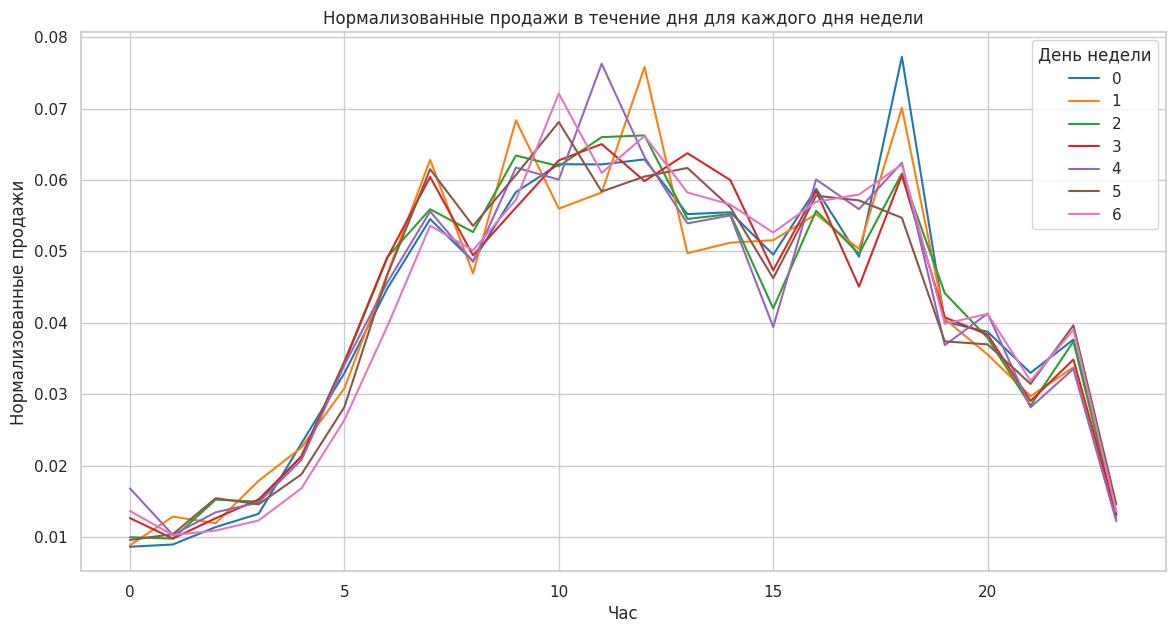

In [30]:
df_grouped['sales_normalized'] = df_grouped.groupby('dow')['sales'].transform(lambda x: x / x.sum())

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped, x='hour', y='sales_normalized', hue='dow', palette='tab10')

plt.title('Нормализованные продажи в течение дня для каждого дня недели')
plt.xlabel('Час')
plt.ylabel('Нормализованные продажи')
plt.legend(title='День недели')

plt.show()

(начальству такие графики показывать не стоит, однако для решения аналитических задач они вполне подойдут)

Мы видим, что в целом <u>_**распределение продаж в течение дня в зависимости от дня недели почти одинаковое**, с небольшими пиками в пятницу в 11 часов, во вторник в 12 и 18 часов, в понедельник в 18 часов_.</u>

### 3. Меняется ли распределение продаж в течение дня в выходные и праздники?

Составим графики распределения продаж в течение дня для следующих условий:  

1. Выходные и праздники  

2. Только выходные  

3. Только праздники  

4. Не выходные и не праздники  

5. Все дни


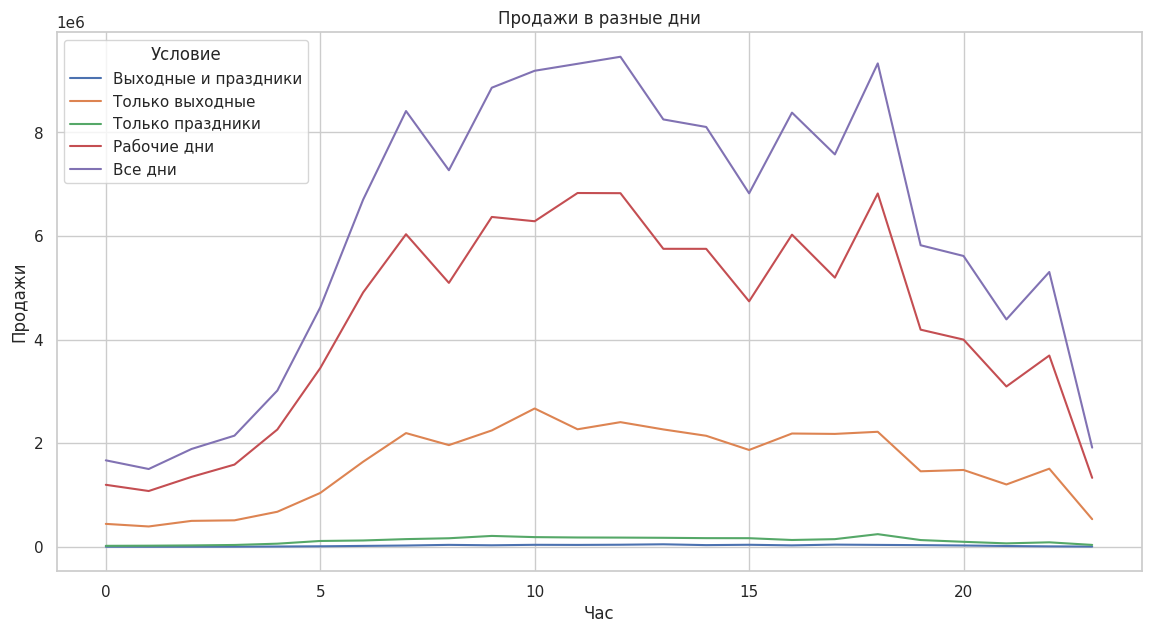

In [34]:
conditions = {
    'weekend and holiday': (df_mod['weekend'] & df_mod['holiday']),
    'weekend only': (df_mod['weekend'] & ~df_mod['holiday']),
    'holiday only': (~df_mod['weekend'] & df_mod['holiday']),
    'neither weekend nor holiday': (~df_mod['weekend'] & ~df_mod['holiday']),
    'all': pd.Series([True] * len(df_mod))
}

sales_data = pd.DataFrame()

for condition_name, condition in conditions.items():
    grouped = df_mod[condition].groupby('hour')['sales'].sum()
    sales_data[condition_name] = grouped

sales_data = sales_data.reset_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_data, x='hour', y='weekend and holiday', label='Выходные и праздники')
sns.lineplot(data=sales_data, x='hour', y='weekend only', label='Только выходные')
sns.lineplot(data=sales_data, x='hour', y='holiday only', label='Только праздники')
sns.lineplot(data=sales_data, x='hour', y='neither weekend nor holiday', label='Рабочие дни')
sns.lineplot(data=sales_data, x='hour', y='all', label='Все дни')

plt.title('Продажи в разные дни')
plt.xlabel('Час')
plt.ylabel('Продажи')
plt.legend(title='Условие')

plt.show()


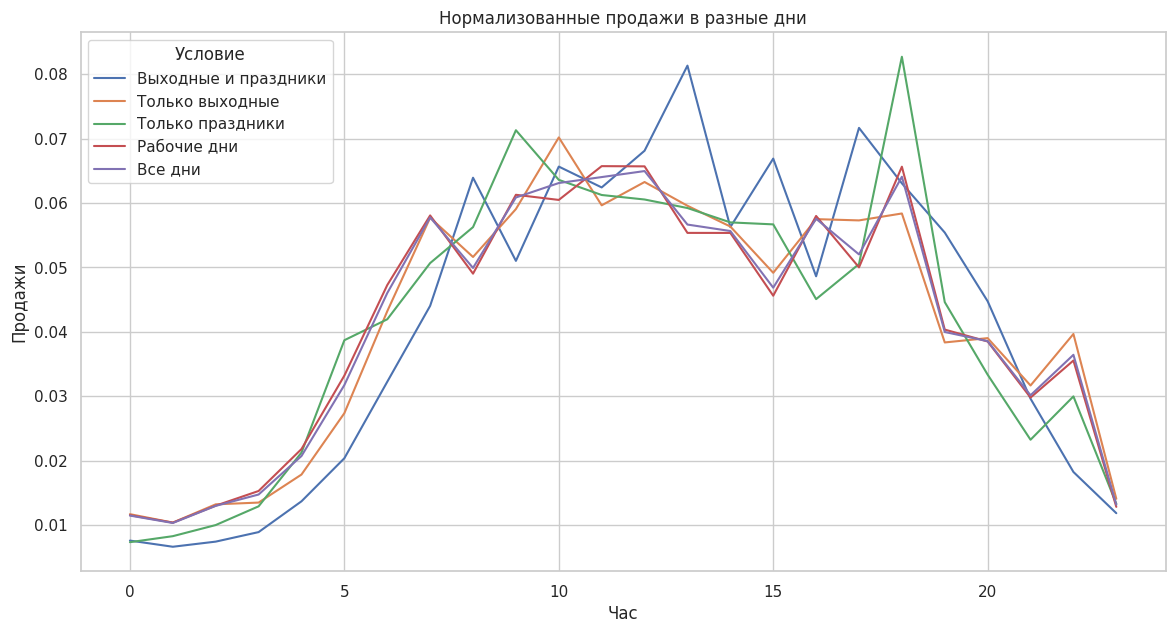

In [37]:
conditions = {
    'weekend and holiday': (df_mod['weekend'] & df_mod['holiday']),
    'weekend only': (df_mod['weekend'] & ~df_mod['holiday']),
    'holiday only': (~df_mod['weekend'] & df_mod['holiday']),
    'neither weekend nor holiday': (~df_mod['weekend'] & ~df_mod['holiday']),
    'all': pd.Series([True] * len(df_mod))
}

normalized_sales = pd.DataFrame()

for condition_name, condition in conditions.items():
    grouped = df_mod[condition].groupby('hour')['sales'].sum()
    normalized = grouped / grouped.sum()
    normalized_sales[condition_name] = normalized

normalized_sales = normalized_sales.reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=normalized_sales, x='hour', y='weekend and holiday', label='Выходные и праздники')
sns.lineplot(data=normalized_sales, x='hour', y='weekend only', label='Только выходные')
sns.lineplot(data=normalized_sales, x='hour', y='holiday only', label='Только праздники')
sns.lineplot(data=normalized_sales, x='hour', y='neither weekend nor holiday', label='Рабочие дни')
sns.lineplot(data=normalized_sales, x='hour', y='all', label='Все дни')

plt.title('Нормализованные продажи в разные дни')
plt.xlabel('Час')
plt.ylabel('Продажи')
plt.legend(title='Условие')

plt.show()

<u>_В целом распределение продаж в выходные, праздничные и рабочие дни совпадает, за исключением пиков продаж в выходные и праздники в 13, 15 и 17 часов, а также в праздники в 18 часов_.</u>

### 4. Зависит ли распределение продаж в течение дня от времени года/месяца?

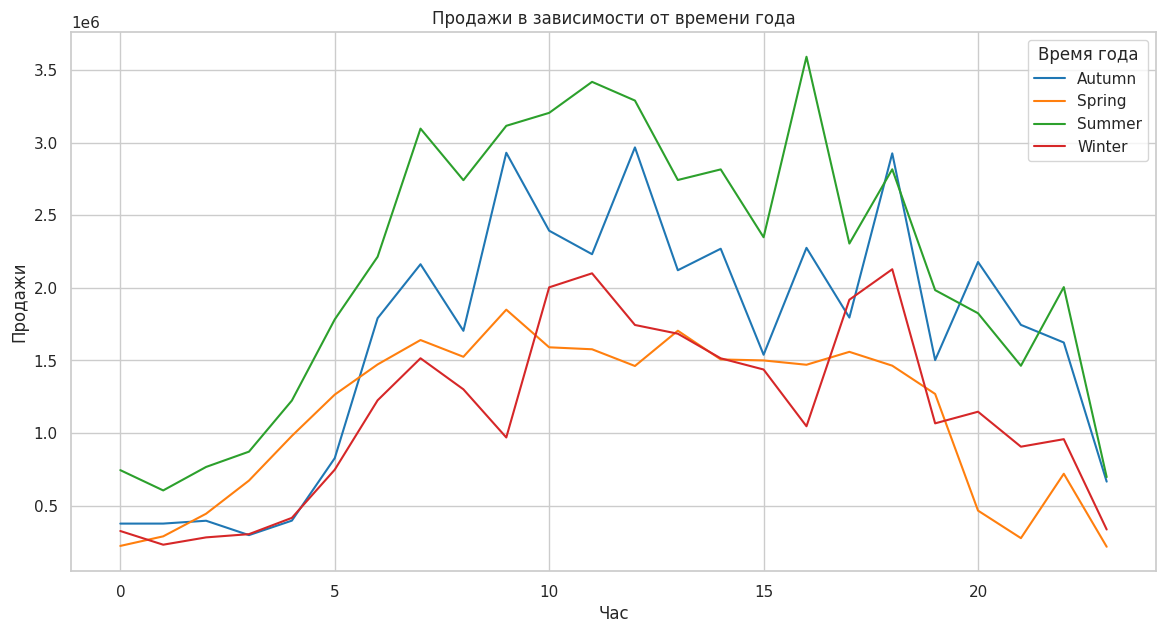

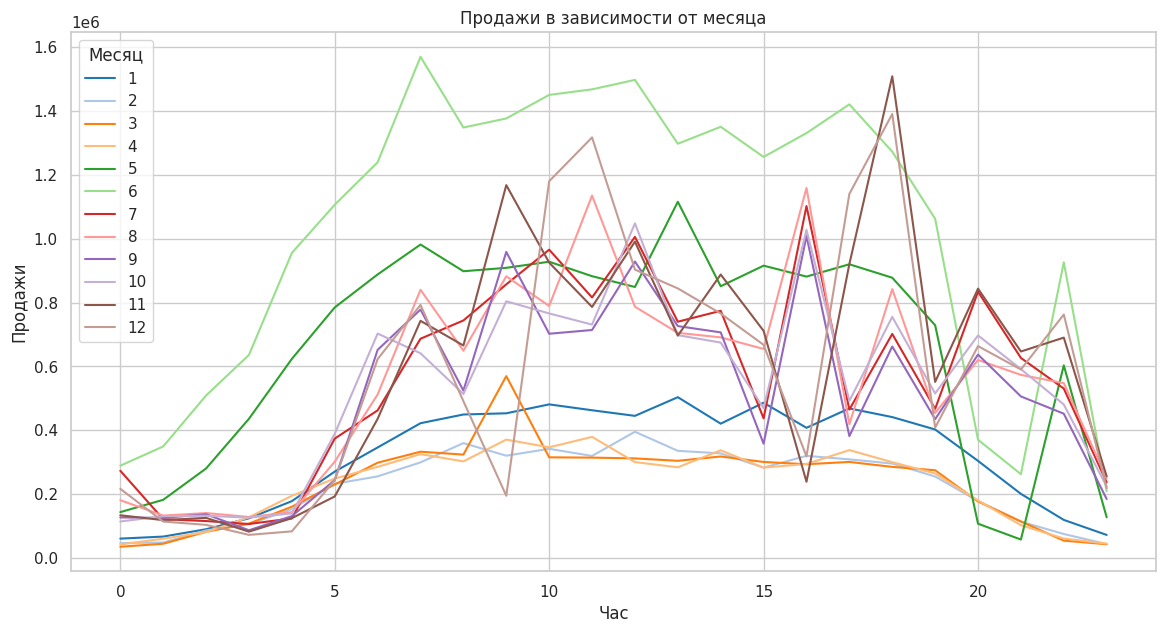

In [38]:
season_grouped = df_mod.groupby(['season', 'hour'])['sales'].sum().reset_index()

month_grouped = df_mod.groupby(['month', 'hour'])['sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=season_grouped, x='hour', y='sales', hue='season', palette='tab10')

plt.title('Продажи в зависимости от времени года')
plt.xlabel('Час')
plt.ylabel('Продажи')
plt.legend(title='Время года')

plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=month_grouped, x='hour', y='sales', hue='month', palette='tab20')

plt.title('Продажи в зависимости от месяца')
plt.xlabel('Час')
plt.ylabel('Продажи')
plt.legend(title='Месяц')

plt.show()

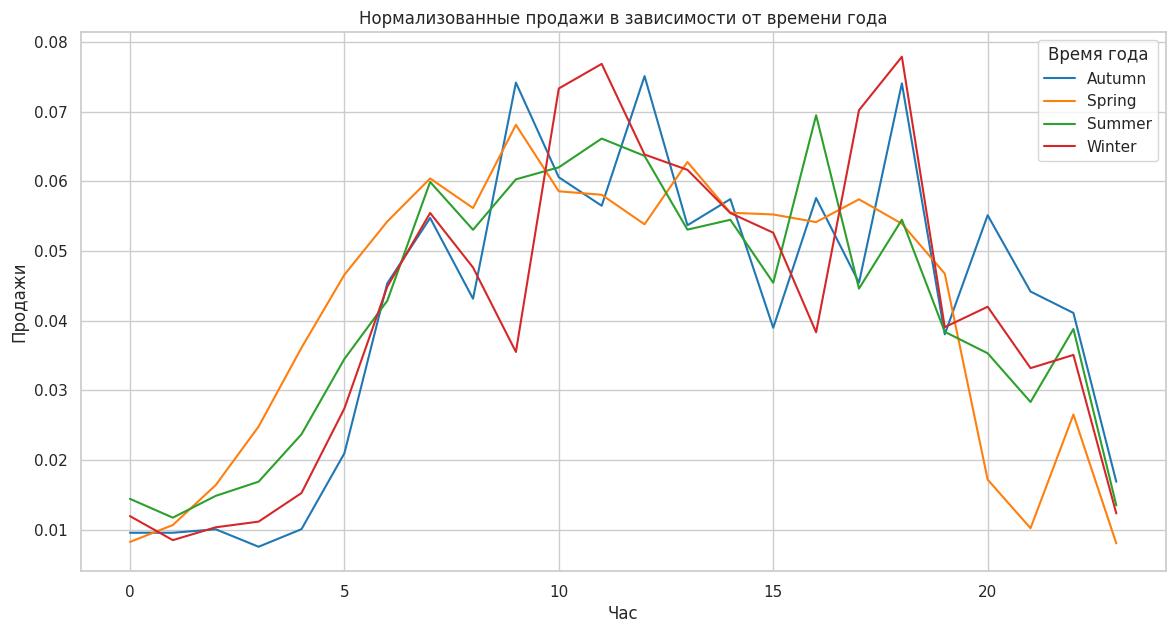

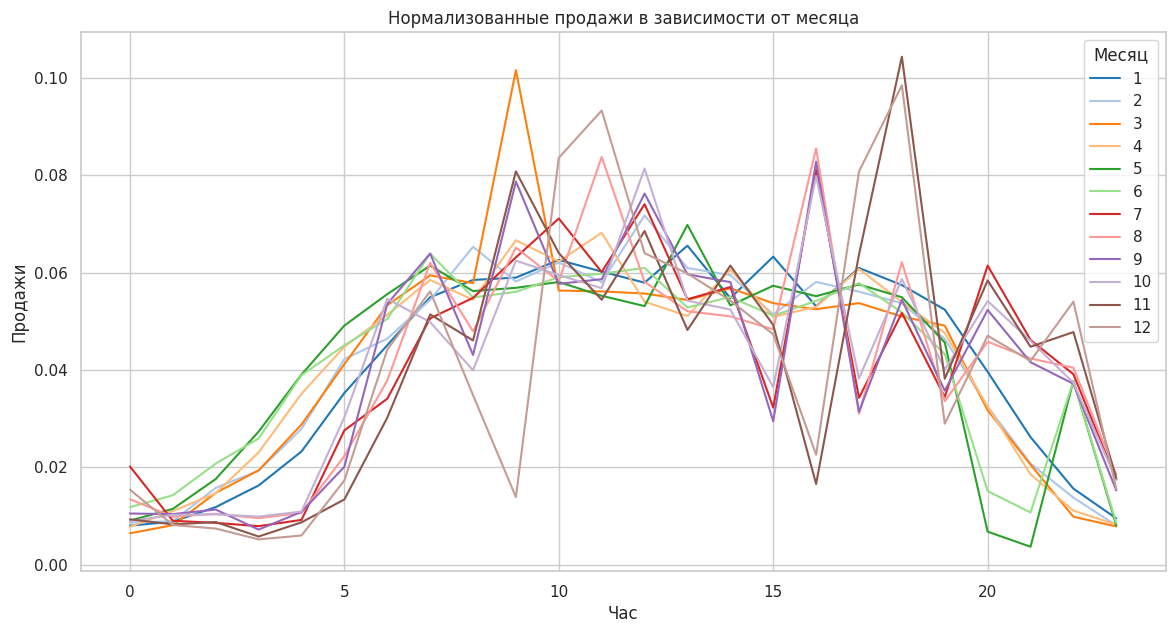

In [39]:
season_grouped = df_mod.groupby(['season', 'hour'])['sales'].sum().reset_index()

# Group by 'month' and 'hour', summing the sales
month_grouped = df_mod.groupby(['month', 'hour'])['sales'].sum().reset_index()

# Normalize the sales for each season
season_grouped['normalized_sales'] = season_grouped.groupby('season')['sales'].transform(lambda x: x / x.sum())

# Normalize the sales for each month
month_grouped['normalized_sales'] = month_grouped.groupby('month')['sales'].transform(lambda x: x / x.sum())

# Plot the normalized data for season
plt.figure(figsize=(14, 7))
sns.lineplot(data=season_grouped, x='hour', y='normalized_sales', hue='season', palette='tab10')

# Add labels and title for season plot
plt.title('Нормализованные продажи в зависимости от времени года')
plt.xlabel('Час')
plt.ylabel('Продажи')
plt.legend(title='Время года')

# Show the plot for season
plt.show()

# Plot the normalized data for month
plt.figure(figsize=(14, 7))
sns.lineplot(data=month_grouped, x='hour', y='normalized_sales', hue='month', palette='tab20')

# Add labels and title for month plot
plt.title('Нормализованные продажи в зависимости от месяца')
plt.xlabel('Час')
plt.ylabel('Продажи')
plt.legend(title='Месяц')

# Show the plot for month
plt.show()

По графику нормализованных продаж мы видим, что <u>_есть единый тренд продаж, при этом выбиваются из тренда майские, ноябрьские и декабрьские продажи_</u>

### 5. Влияет ли категория товара (предмет или группа предметов) на распределение продаж в течение дня?

Проверим количество уникальных значений в датафрейме `sku` (данные о принадлежности товаров к предмету (категории))

In [ ]:
sku.nunique()

id            8845
subject_id     839
dtype: int64

Создадим датафрейм с данными о предметах

In [40]:
names = pd.read_csv('/content/data/subject_names.csv')
names

subject_id                                name  \
0              1                              Одежда   
1              2                               Обувь   
2              3                          Аксессуары   
3              4                               Белье   
4              6                      Головные уборы   
...          ...                                 ...   
7759        8477                   Наглядные пособия   
7760        8478            Влажная туалетная бумага   
7761        8479             Красители для рукоделия   
7762        8480  Запчасти для оборудования общепита   
7763        8481            Термометры для бассейнов   

                         groupname  
0                           Одежда  
1                            Обувь  
2                       Аксессуары  
3                            Белье  
4                   Головные уборы  
...                            ...  
7759     Книжная продукция и диски  
7760          Хозяйственные товары  
7761                     Рукоделие  
7762               Бытовая техника  
7763  Товары для отдыха и кемпинга  

[7764 rows x 3 columns]

Проверим уникальные значения в новом датафрейме

In [41]:
names.nunique()

subject_id    7764
name          7764
groupname       71
dtype: int64

Уникальных значений `subject_id` в датафрейме `names` почти в 10 раз больше, чем в датафрейме `sku` (7764 против 839). Ничего страшного, соединим ("смёрджим") таблицы, и у нас останется только то, что нужно.

In [42]:
sku_names = pd.merge(sku, names, on='subject_id', how='inner')
sku_names

id  subject_id                               name  \
0     420838592        2652               Перчатки одноразовые   
1     176311742        2652               Перчатки одноразовые   
2     420848309        2652               Перчатки одноразовые   
3     176312858        2652               Перчатки одноразовые   
4      50114948        2652               Перчатки одноразовые   
...         ...         ...                                ...   
8840   51508283        2233                 Сетки для глажения   
8841   36761333        7021  Наборы автомобильных инструментов   
8842   47267033         672                    Щетки для обуви   
8843   45087953        5576      Вакуумно-волновые стимуляторы   
8844   54990293        1881                  Лента упаковочная   

                 groupname  
0        Спецодежда и СИЗы  
1        Спецодежда и СИЗы  
2        Спецодежда и СИЗы  
3        Спецодежда и СИЗы  
4        Спецодежда и СИЗы  
...                    ...  
8840  Хозяйственные товары  
8841  Автомобильные товары  
8842  Аксессуары для обуви  
8843   Товары для взрослых  
8844         Для праздника  

[8845 rows x 4 columns]

Поверим уникальные значения в получившемся датафрейме

In [43]:
sku_names.nunique()

id            8845
subject_id     839
name           839
groupname       56
dtype: int64

Количество уникальных `subject_id` выровнялось с количеством в датафрейме `sku`, количество `groupname` снизилось с 71 до 56.

Теперь соединим нашу фактическую таблицу `df_mod` с `sku_names`. Новый датафрейм, `df_sku_names`, будет нашей денормализованной фактической таблицей для анализа и ответа на вопрос.

In [44]:
df_sku_names = pd.merge(sku_names, df_mod, on='id', how='inner')
df_sku_names

id  subject_id                  name          groupname  \
0        420838592        2652  Перчатки одноразовые  Спецодежда и СИЗы   
1        420838592        2652  Перчатки одноразовые  Спецодежда и СИЗы   
2        420838592        2652  Перчатки одноразовые  Спецодежда и СИЗы   
3        420838592        2652  Перчатки одноразовые  Спецодежда и СИЗы   
4        420838592        2652  Перчатки одноразовые  Спецодежда и СИЗы   
...            ...         ...                   ...                ...   
8742426   54990293        1881     Лента упаковочная      Для праздника   
8742427   54990293        1881     Лента упаковочная      Для праздника   
8742428   54990293        1881     Лента упаковочная      Для праздника   
8742429   54990293        1881     Лента упаковочная      Для праздника   
8742430   54990293        1881     Лента упаковочная      Для праздника   

              date  hour  dow  sales  weekend  holiday  month  season  
0       2023-03-03     0    4      2    False    False      3  Spring  
1       2023-03-03     1    4      2    False    False      3  Spring  
2       2023-03-03     2    4      7    False    False      3  Spring  
3       2023-03-03     3    4      4    False    False      3  Spring  
4       2023-03-03     4    4     12    False    False      3  Spring  
...            ...   ...  ...    ...      ...      ...    ...     ...  
8742426 2022-12-29    16    3      2    False    False     12  Winter  
8742427 2022-12-29    17    3      3    False    False     12  Winter  
8742428 2022-12-29    18    3      5    False    False     12  Winter  
8742429 2022-12-29    19    3      6    False    False     12  Winter  
8742430 2022-12-29    23    3      5    False    False     12  Winter  

[8742431 rows x 12 columns]

Проверим уникальные значения в получившемся датафрейме.

In [45]:
df_sku_names.nunique()

id            8845
subject_id     839
name           839
groupname       56
date           360
hour            24
dow              7
sales         3281
weekend          2
holiday          2
month           12
season           4
dtype: int64

839 предметов и 56 категорий. Цифры немаленькие,что-то с этим надо будет делать...

Создадим датафрейм с продажами товаров по часам

In [47]:
name_sales = df_sku_names.groupby(['name', 'hour'])['sales'].sum().reset_index()
name_sales

name  hour  sales
0               BB-кремы     0    510
1               BB-кремы     1    576
2               BB-кремы     2    724
3               BB-кремы     3    972
4               BB-кремы     4   1200
...                  ...   ...    ...
19867  Ювелирные цепочки    19  22239
19868  Ювелирные цепочки    20   8376
19869  Ювелирные цепочки    21   4599
19870  Ювелирные цепочки    22   3990
19871  Ювелирные цепочки    23   1724

[19872 rows x 3 columns]

Посмотрим статистику данных нового датафрейма

In [48]:
name_sales.describe()

hour          sales
count  19872.000000   19872.000000
mean      11.531049    7327.913094
std        6.906373   24349.997188
min        0.000000       1.000000
25%        6.000000     176.000000
50%       12.000000     800.000000
75%       18.000000    4300.250000
max       23.000000  452792.000000

Построим график продаж товаров по часам. Да, там будет 839 линий, но это все равно будет понятнее, чем таблица на 19872 строки

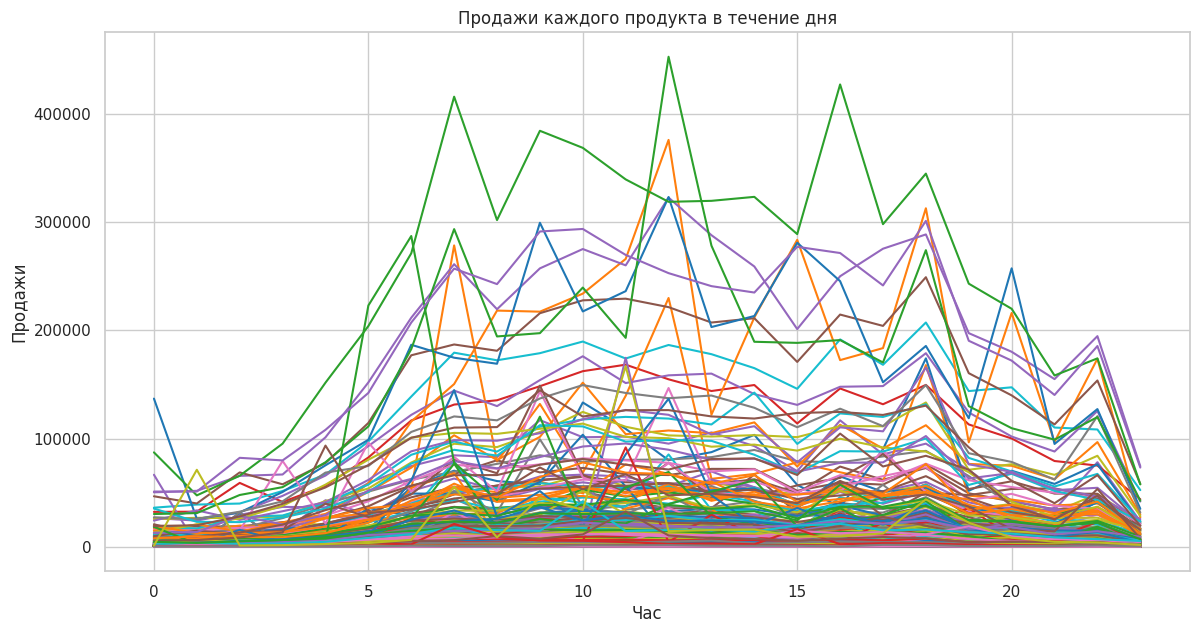

In [55]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=name_sales, x='hour', y='sales', hue='name', palette='tab10', legend=False)

plt.title('Продажи каждого продукта в течение дня')
plt.xlabel('Час')
plt.ylabel('Продажи')

plt.show()

Мы можем посмотреть, какие товары продавались намного чаще (в абсолютном выражении). Для этого Возьмем за точку отсчета 200 тысяч единиц за час и выведем список товаров

In [52]:
name_sales[name_sales['sales'] > 200000]['name'].unique()

array(['Гели', 'Гели для бровей', 'Колготки', 'Кремы',
       'Маски косметические', 'Носки', 'Туши', 'Учебники', 'Футболки',
       'Шампуни'], dtype=object)

Теперь посмотрим относительные показатели продаж товаров в течение дня

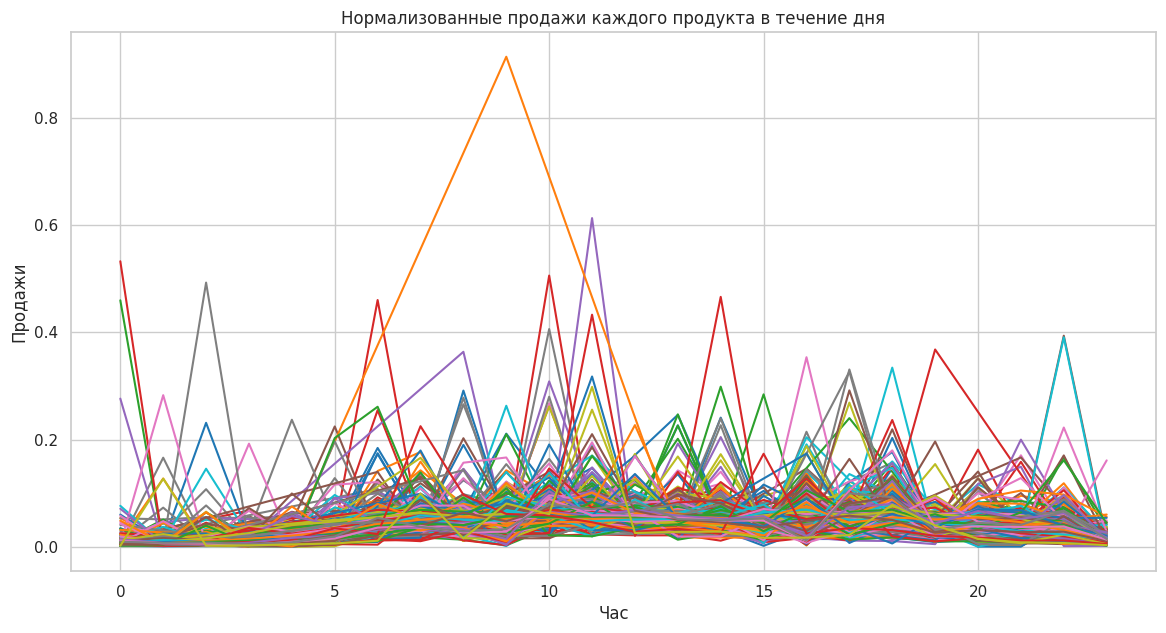

In [54]:
ns = name_sales
ns['normalized_sales'] = ns.groupby('name')['sales'].transform(lambda x: x / x.sum())

plt.figure(figsize=(14, 7))
sns.lineplot(data=ns, x='hour', y='normalized_sales', hue='name', palette='tab10', legend=False)

plt.title('Нормализованные продажи каждого продукта в течение дня')
plt.xlabel('Час')
plt.ylabel('Продажи')

plt.show()

Здесь мы видим один товар, который сильно выбивается из массы (в 9 часов у него более 80% продаж). Выясним, что это за товар, также выведем список товаров, которые продавались в объеме более 40% за один час

In [56]:
ns[ns['normalized_sales'] > 0.8]['name'].unique()

array(['Лонгсливы для малышей'], dtype=object)

In [57]:
ns[ns['normalized_sales'] > 0.4]['name'].unique()

array(['Беруши', 'Глина для лепки', 'Карандаши', 'Кофточки для малышей',
       'Кружки', 'Лонгсливы для малышей', 'Наборы для барбекю',
       'Наборы столовых приборов', 'Очищающие полоски', 'Фломастеры'],
      dtype=object)

Теперь попробуем сегментировать наши товары. Для этого добавим немного ML: разделим наши товары на 5 кластеров, используя KMeans Clustering

Для этого для каждого товара создадим из колонки `normalized_sales` векторы длиной в 24 элемента (по количеству часов в сутках), затем запустим кластерный анализ

In [61]:
ns

name  hour  sales  normalized_sales
0               BB-кремы     0    510          0.009533
1               BB-кремы     1    576          0.010766
2               BB-кремы     2    724          0.013533
3               BB-кремы     3    972          0.018168
4               BB-кремы     4   1200          0.022430
...                  ...   ...    ...               ...
19867  Ювелирные цепочки    19  22239          0.039744
19868  Ювелирные цепочки    20   8376          0.014969
19869  Ювелирные цепочки    21   4599          0.008219
19870  Ювелирные цепочки    22   3990          0.007131
19871  Ювелирные цепочки    23   1724          0.003081

[19872 rows x 4 columns]

In [62]:
pivot_table = ns.pivot_table(index='name', columns='hour', values='normalized_sales', fill_value=0)

# Convert rows to lists
pivot_table['vector'] = pivot_table.apply(lambda row: row.tolist(), axis=1)

# Reset the index to have 'name' as a column
result = pivot_table[['vector']].reset_index()

In [63]:
from sklearn.preprocessing import StandardScaler

# Extract vectors
vectors = np.array(result['vector'].tolist())

# Standardize the vectors
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)


In [64]:
from sklearn.cluster import KMeans

# Determine the number of clusters (e.g., 5 clusters)
num_clusters = 5

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
result['cluster'] = kmeans.fit_predict(vectors_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Можем посмотреть векторы и кластеры для каждого товара

In [65]:
result

hour                name                                             vector  \
0               BB-кремы  [0.009532710280373832, 0.010766355140186916, 0...   
1       Flash-накопители  [0.006398153975246486, 0.007551919446192574, 0...   
2            L-карнитины  [0.010221465076660987, 0.005110732538330494, 0...   
3         SSD-накопители  [0.009613498136158525, 0.00529723366686286, 0....   
4              Автозагар  [0.008860937061629104, 0.019720845412886934, 0...   
..                   ...                                                ...   
834      Ювелирные колье  [0.014130791981597108, 0.007229707525468288, 0...   
835     Ювелирные кольца  [0.005461482347017166, 0.004957941421405654, 0...   
836   Ювелирные подвески  [0.011722272317403066, 0.006537421100090171, 0...   
837     Ювелирные серьги  [0.009379796486839861, 0.007503837189471889, 0...   
838    Ювелирные цепочки  [0.0020319536778897703, 0.12709807706054757, 0...   

hour  cluster  
0           2  
1           2  
2           4  
3           4  
4           4  
..        ...  
834         0  
835         0  
836         0  
837         0  
838         0  

[839 rows x 3 columns]

Теперь попробуем визуализировать результат. Нам нужно сжать 24 измерения до двух (плоскости). Для этого используем PCA (Principal Component Analysis)

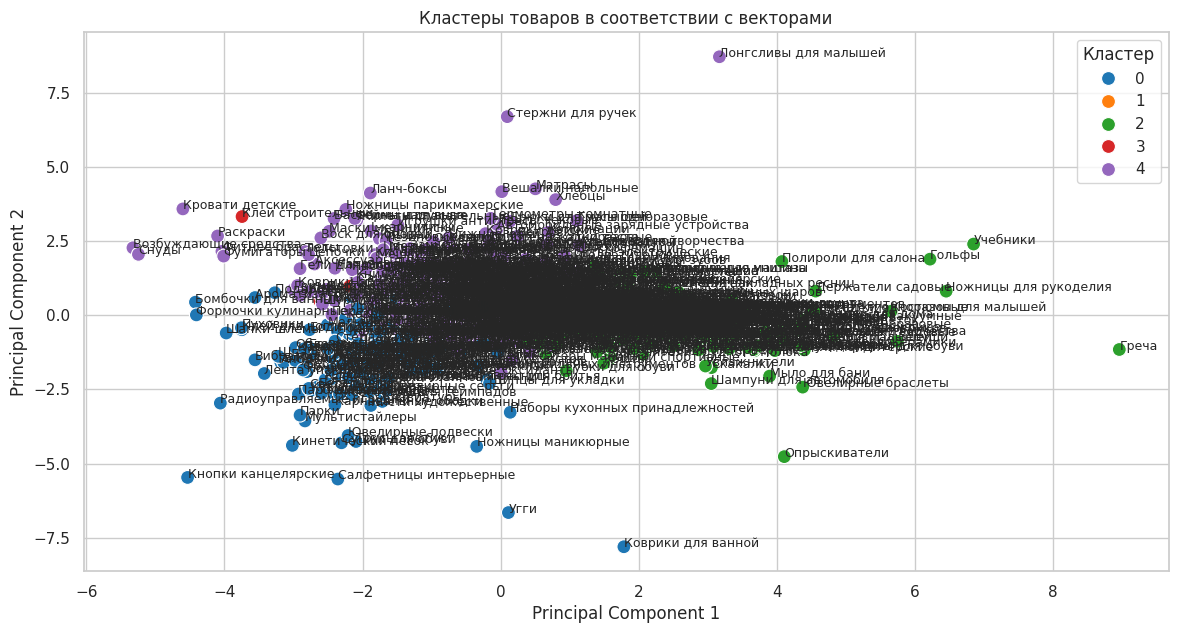

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors_scaled)

pca_df = pd.DataFrame(data=vectors_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = result['cluster']
pca_df['name'] = result['name']

plt.figure(figsize=(14, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='tab10', s=100)
for i, txt in enumerate(pca_df['name']):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=9)
plt.title('Кластеры товаров в соответствии с векторами')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Кластер')
plt.show()


Рассмотрим отдельные кластеры

In [75]:
ns_cluster = pd.merge(ns, result, on='name', how='inner').reset_index().drop(columns=['vector', 'index'])
ns_cluster

name  hour  sales  normalized_sales  cluster
0               BB-кремы     0    510          0.009533        2
1               BB-кремы     1    576          0.010766        2
2               BB-кремы     2    724          0.013533        2
3               BB-кремы     3    972          0.018168        2
4               BB-кремы     4   1200          0.022430        2
...                  ...   ...    ...               ...      ...
19867  Ювелирные цепочки    19  22239          0.039744        0
19868  Ювелирные цепочки    20   8376          0.014969        0
19869  Ювелирные цепочки    21   4599          0.008219        0
19870  Ювелирные цепочки    22   3990          0.007131        0
19871  Ювелирные цепочки    23   1724          0.003081        0

[19872 rows x 5 columns]

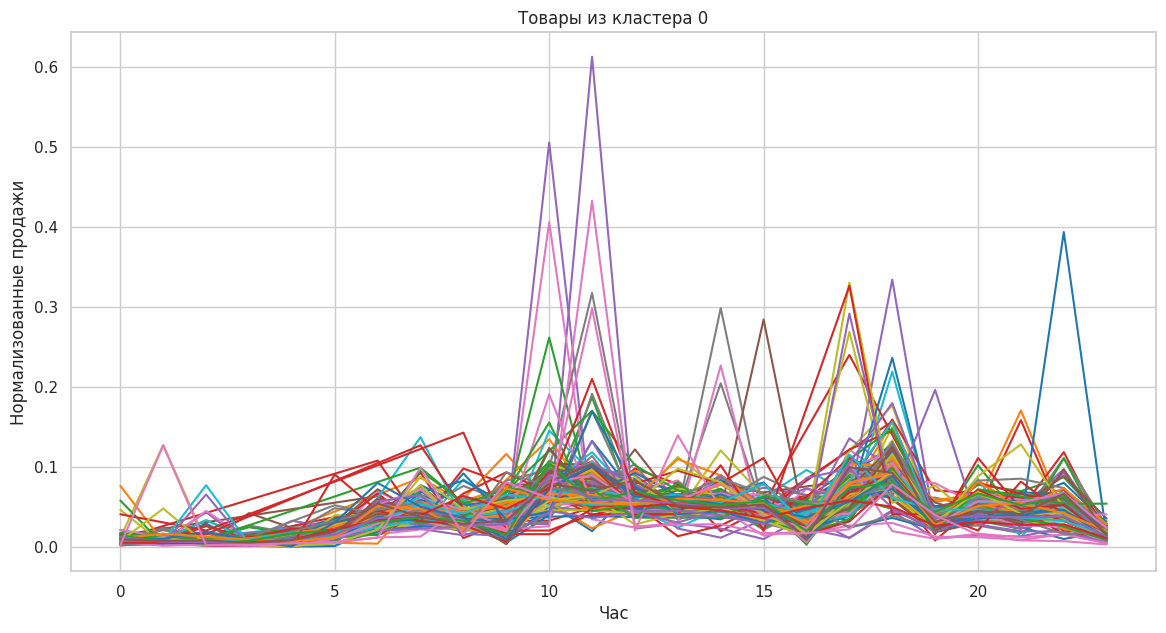

In [79]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=ns_cluster[ns_cluster['cluster'] == 0], x='hour', y='normalized_sales', hue='name', palette='tab10', legend=False)

plt.title('Товары из кластера 0')
plt.xlabel('Час')
plt.ylabel('Нормализованные продажи')

plt.show()

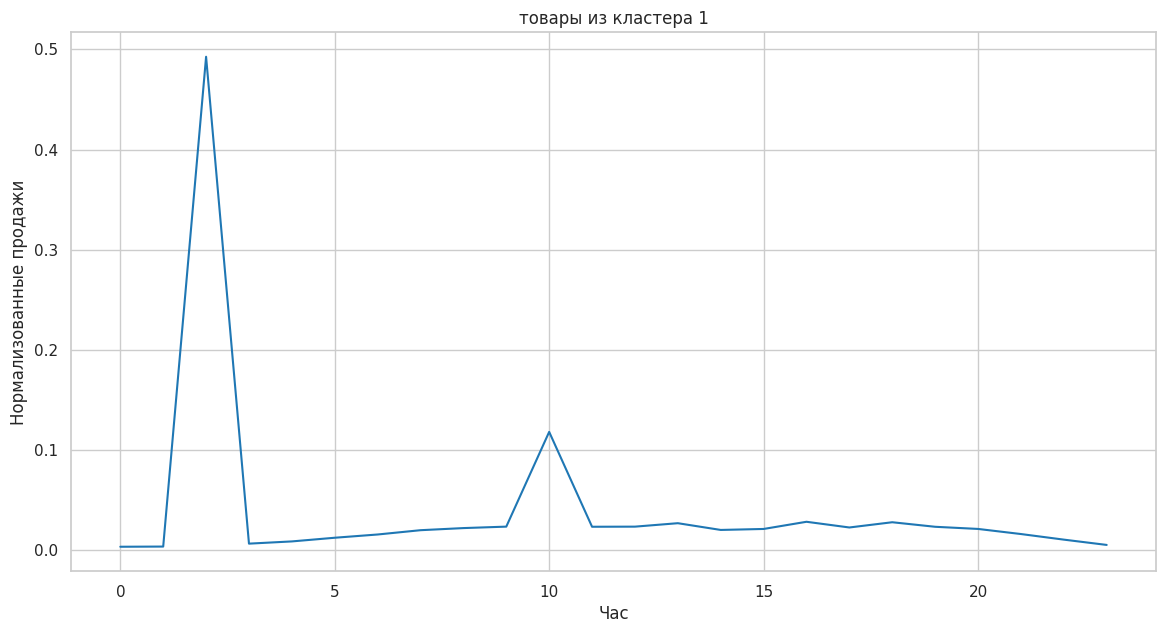

In [84]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=ns_cluster[ns_cluster['cluster'] == 1], x='hour', y='normalized_sales', hue='name', palette='tab10', legend=False)

plt.title('товары из кластера 1')
plt.xlabel('Час')
plt.ylabel('Нормализованные продажи')

plt.show()

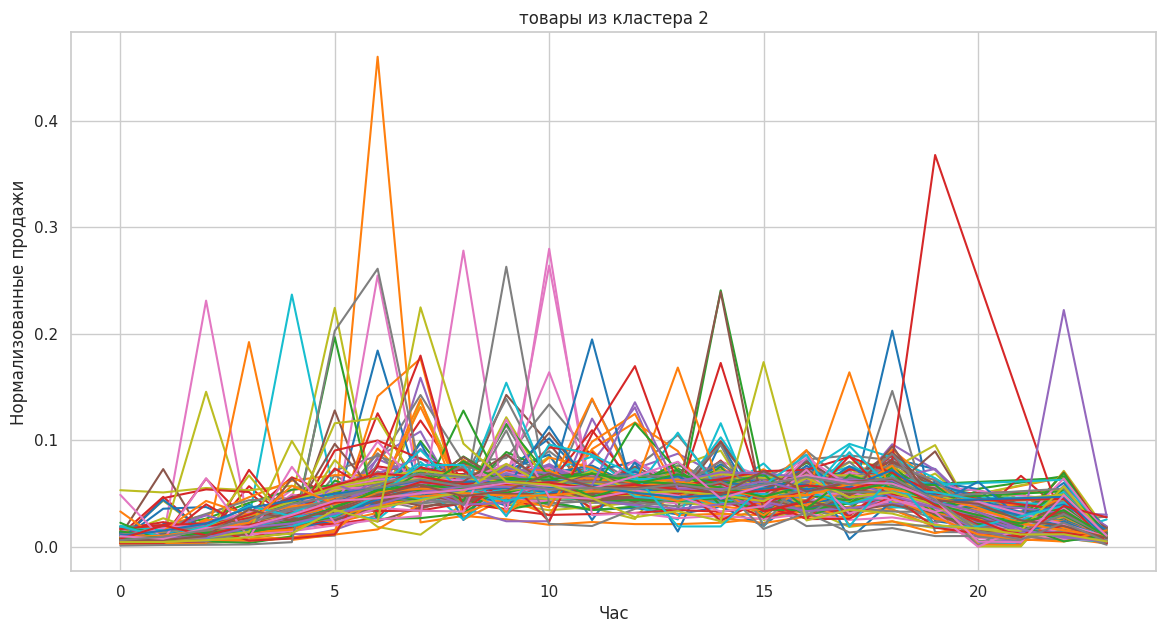

In [85]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=ns_cluster[ns_cluster['cluster'] == 2], x='hour', y='normalized_sales', hue='name', palette='tab10', legend=False)

plt.title('товары из кластера 2')
plt.xlabel('Час')
plt.ylabel('Нормализованные продажи')

plt.show()

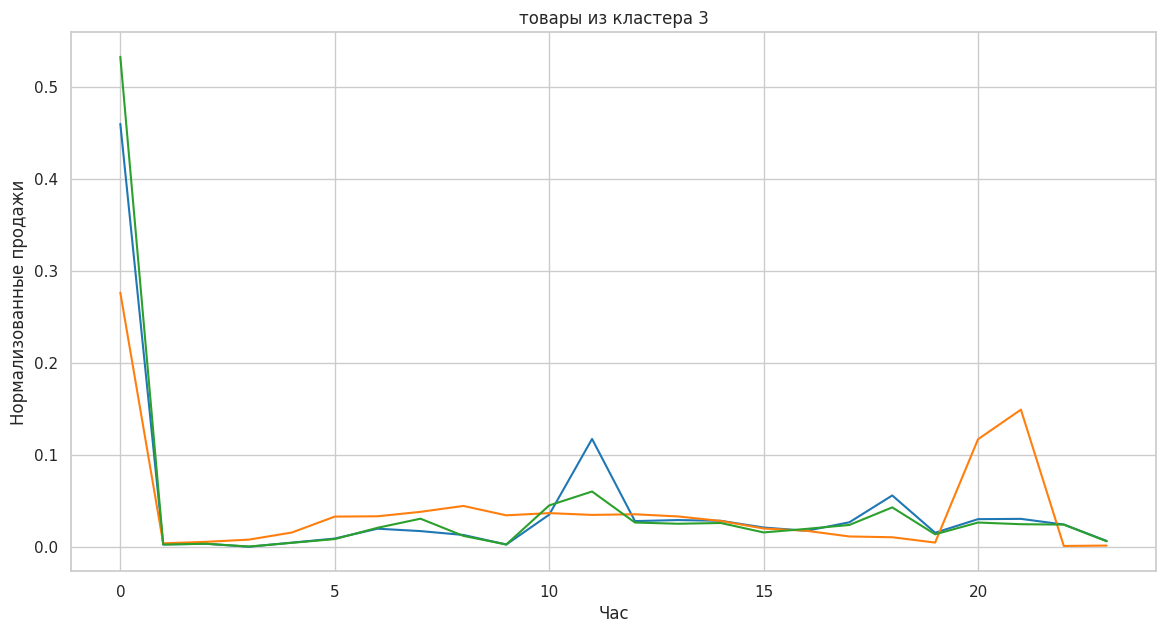

In [86]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=ns_cluster[ns_cluster['cluster'] == 3], x='hour', y='normalized_sales', hue='name', palette='tab10', legend=False)

plt.title('товары из кластера 3')
plt.xlabel('Час')
plt.ylabel('Нормализованные продажи')

plt.show()

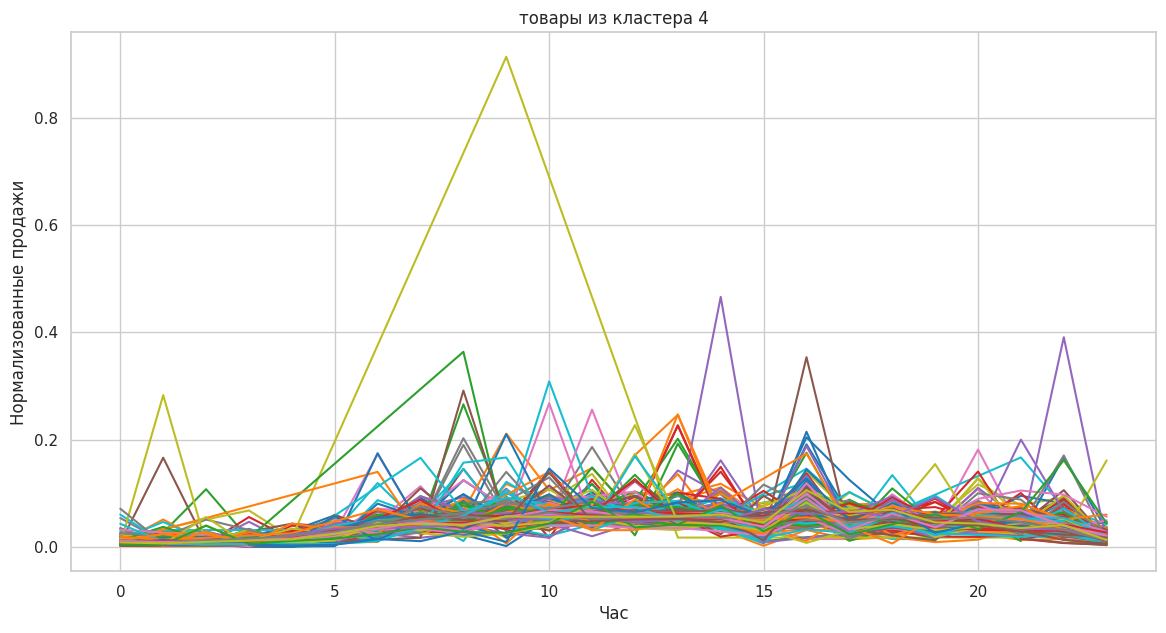

In [87]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=ns_cluster[ns_cluster['cluster'] == 4], x='hour', y='normalized_sales', hue='name', palette='tab10', legend=False)

plt.title('товары из кластера 4')
plt.xlabel('Час')
plt.ylabel('Нормализованные продажи')

plt.show()

В целом внутри кластеров видны линии тренда, однако по кластерам товары разделены неравномерно (из 800+ товаров только 4 попадают в кластеры 1 и 3); также внутри кластеров с большим количеством товаров наблюдаются выбросы (outliers). Возможно, имеет смысл изменить количество кластеров, обработать данные или выбрать другой инструмент для анализа.

<br>  
Перейдем теперь к группам товаров

In [88]:
groupname_sales = df_sku_names.groupby(['groupname', 'hour'])['sales'].sum().reset_index()
groupname_sales

groupname  hour  sales
0     Автомобильные товары     0   6098
1     Автомобильные товары     1   5314
2     Автомобильные товары     2   7006
3     Автомобильные товары     3   9263
4     Автомобильные товары     4  13029
...                    ...   ...    ...
1329   Ювелирные украшения    19  29105
1330   Ювелирные украшения    20  15980
1331   Ювелирные украшения    21  10992
1332   Ювелирные украшения    22  11003
1333   Ювелирные украшения    23   4242

[1334 rows x 3 columns]

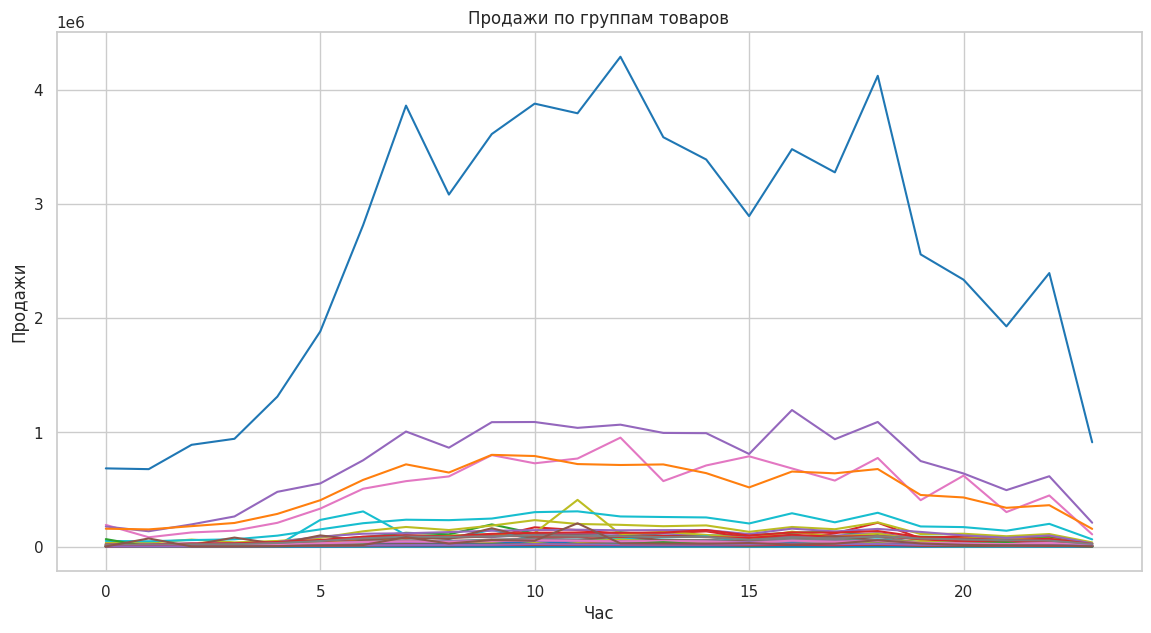

In [89]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))
sns.lineplot(data=groupname_sales, x='hour', y='sales', hue='groupname', palette='tab10', legend=False)

plt.title('Продажи по группам товаров')
plt.xlabel('Час')
plt.ylabel('Продажи')

plt.show()

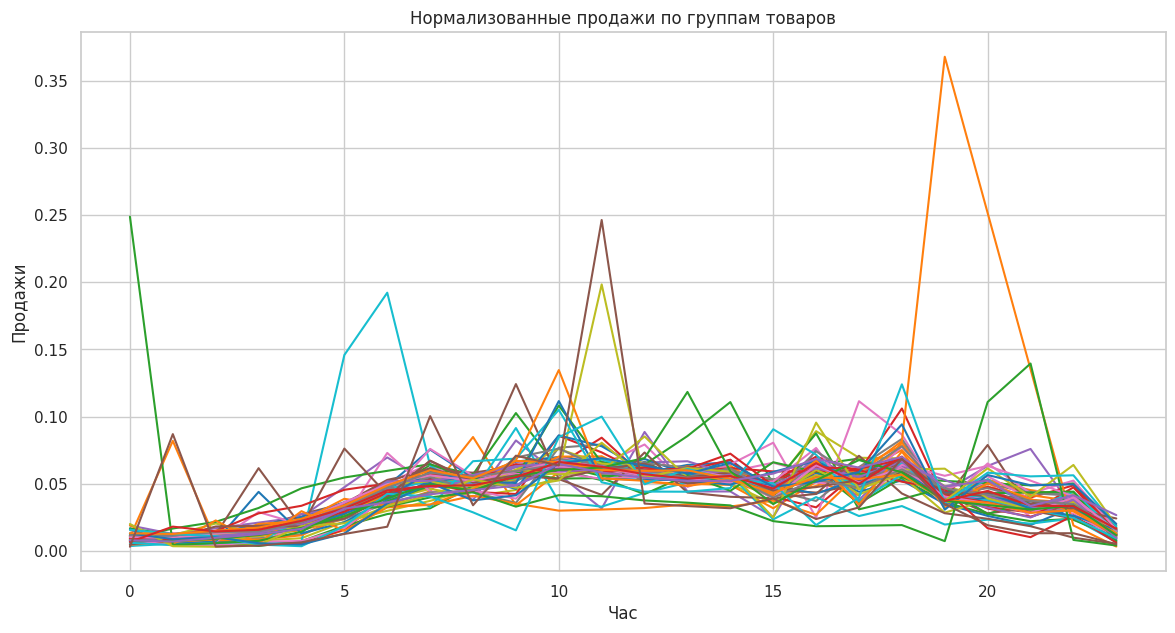

In [90]:
gs = groupname_sales
gs['normalized_sales'] = gs.groupby('groupname')['sales'].transform(lambda x: x / x.sum())

plt.figure(figsize=(14, 7))
sns.lineplot(data=gs, x='hour', y='normalized_sales', hue='groupname', palette='tab10', legend=False)

plt.title('Нормализованные продажи по группам товаров')
plt.xlabel('Час')
plt.ylabel('Продажи')

plt.show()

В продажах по группам товаров в течение дня виден тренд, однако есть и "выбросы".   

Выведем список групп товаров, продажи которых превышают 13% в любой из часов.

In [92]:
gs[gs['normalized_sales'] >= 0.13]['groupname'].unique()

array(['Канцелярские товары', 'Книжная продукция и диски',
       'Садовая техника', 'Строительные инструменты',
       'Строительные материалы', 'Ювелирные украшения'], dtype=object)

Таким образом, мы видим, что <u>_в продажах товаров и групп товаров есть определенные закономерности, но некоторые товары и их группы выбиваются их тренда_</u>.

<br>  

## Спасибо за внимание!  


Михаил Караваев, аналитик

karavaevms@gmail.com  

https://t.me/karavaevms  

https://www.linkedin.com/in/mikhail-karavaev/